In [1]:
import sys
from collections import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import seaborn as sns
import random

# Fig 1

In [2]:
def get_snps_list(dnm_file):
    
    type_snp_list = []
    with open(dnm_file, "r") as inf:
        for line in inf:
            tmp = line.split("\t")
            type_tmp = tmp[-1].split("|")[:2]
            #print(tmp[:4] + [type_tmp[-1]])
            type_snp_list.append(tuple(tmp[:4] + [type_tmp[-1]]))

    type_list = []
    for i in Counter(type_snp_list).keys():
        i = list(i)
        type_list.append(i[-1])
    return type_list

In [3]:
FR24 = Counter(get_snps_list("FR24.dnm.annt.stats"))
FR26 = Counter(get_snps_list("FR26.dnm.annt.stats"))
FR31 = Counter(get_snps_list("FR31.dnm.annt.stats"))

In [4]:
FR24

Counter({'intron_variant': 23,
         'intergenic_region': 23,
         'downstream_gene_variant': 2,
         'upstream_gene_variant': 1,
         '3_prime_UTR_variant': 2,
         'synonymous_variant': 1})

In [5]:
FR26

Counter({'intron_variant': 27,
         'upstream_gene_variant': 12,
         'missense_variant': 2,
         'intergenic_region': 22,
         'downstream_gene_variant': 7,
         '3_prime_UTR_variant': 1})

In [6]:
FR31

Counter({'intergenic_region': 8,
         'intron_variant': 8,
         'downstream_gene_variant': 1,
         'upstream_gene_variant': 2})

In [8]:
df2 = pd.read_csv("mutType.txt", sep="\t")
df3 = pd.read_csv("sharedMut.txt", sep="\t")
df4 = pd.read_csv("mut_rate.csv", sep = "\t")

In [22]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10), dpi=800)

######################################################################################
####################################### plot 1 #######################################
######################################################################################
# total 24
FR24 = {'Intron': 10,
         'Intergenic': 9,
         'Downstream': 2,
         'Upstream': 1,
         'Synonymous': 1,
         '3\' UTR': 1}

# total 58
FR26 = {'Intron': 22,
         'Downstream': 8,
         'Upstream': 13,
         'Missense': 2,
         'Intergenic': 13,
         }

#total 14
FR31 = {'Intergenic': 7,
         'Downstream': 1,
         'Intron': 4,
         'Upstream': 2} 


df = pd.DataFrame([['Synonymous', 1/24*100, 0, 0],
                   ['Missense', 0, 2/58*100, 0],
                   ['Upstream', 1/24*100, 13/58*100, 2/14*100],
                   ['Downstream', 2/24*100, 8/58*100, 1/14*100],
                   ['Intron', 10/24*100, 22/58*100, 4/14*100], 
                   ['Intergenic', 9/24*100, 13/58*100, 7/14*100],  
                   ['3\' UTR', 1/24*100, 0, 0]],
                  columns = ['name', 'Fam1', 'Fam2', 'Fam3'])
barWidth = 0.15
FR24 = list(df["Fam1"])
FR26 = list(df["Fam2"])
FR31 = list(df["Fam3"])
br1 = np.arange(len(FR24))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
axs[0,1].bar(br1, FR24,color ='#DA9B4F',width = barWidth,edgecolor ='grey', label ='Fam1')
axs[0,1].bar(br2, FR26,color ='#7794C3',width = barWidth,edgecolor ='grey', label ='Fam2')
axs[0,1].bar(br3, FR31, color ='#A3B18A', width = barWidth, edgecolor ='grey', label ='Fam3')
#plt.bar(br1,FR24,color ='darkorange',width = barWidth,edgecolor ='grey', label ='FR24')
#plt.bar(br2,FR26,color ='#006494',width = barWidth,edgecolor ='grey', label ='FR26')
#plt.bar(br3, FR31, color ='grey', width = barWidth, edgecolor ='grey', label ='FR31')
axs[0,1].set_xticks([r + barWidth for r in range(len(FR24))])
axs[0,1].set_yticks([0,10,20,30,40,50,60])
#axs[0,0].set_xticklabels(list(["Synonymous","Missense", "Upstream","Downstream","Intron","Intergenic","3' UTR"]), fontweight='bold')
axs[0,1].set_xticklabels(list(["Syn","Mis", "Up","Down","Int","IG","3'UTR"]), fontweight='bold')
axs[0,1].set_yticklabels(range(0,70,10),fontweight='bold')
axs[0,1].tick_params(axis='y', labelsize=10)
axs[0,1].tick_params(axis='x', labelsize=10)
axs[0,1].set_xlabel('Type', fontsize = 12)
axs[0,1].set_ylabel('Percentage of DNMs', fontsize = 12)

axs[0,1].plot(
        [0, 0, 1, 1],
        [49, 49.5, 49.5, 49], lw=1, c='k'
    )
axs[0,1].plot(
        [2, 2, 6, 6],
        [51, 51.5, 51.5, 51], lw=1, c='k'
    )
axs[0,1].plot(
        [0.5, 0.5, 4, 4],
        [52.3, 55.5, 55.5, 54], lw=1, c='k'
    )
axs[0,1].text((0+1)/2, 49.5, "CDS", ha='center', va='bottom', c='k', fontsize=10)
axs[0,1].text((2+6)/2, 51.5, "non-CDS", ha='center', va='bottom', c='k', fontsize=10)
axs[0,1].text((0.5+4)/2, 55.5, "NS, $P $ = 0.37", ha='center', va='bottom', c='k', fontsize=10)
#axs[1,1].text((2 + 3) * 0.5, 4.05, "***", ha='center', va='bottom', c='k', fontsize=12)
#axs[1,1].text((1 + 3) * 0.5, 4.35, "ns", ha='center', va='bottom', c='k', fontsize=12)
#axs[1,1].text((1 + 2) * 0.5, 3.75, "***", ha='center', va='bottom', c='k', fontsize=12)
#'#E0C9A7'
axs[0,1].spines['top'].set_visible(False)
axs[0,1].spines['right'].set_visible(False)
axs[0,1].set_ylim(0, 60)


######################################################################################
####################################### plot 2 #######################################
######################################################################################
barWidth = 0.25
FR24 = [int(x)/24 for x in list(df2["FR24"])] 
FR26 = [int(x)/58 for x in list(df2["FR26"])] 
FR31 = [int(x)/14 for x in list(df2["FR31"])] 
br1 = np.arange(len(FR24))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
axs[1,0].bar(br1, FR24, color ='#DA9B4F', width = barWidth, edgecolor ='grey', label ='Fam1')
axs[1,0].bar(br2, FR26, color ='#7794C3', width = barWidth, edgecolor ='grey', label ='Fam2')
axs[1,0].bar(br3, FR31, color ='#A3B18A', width = barWidth, edgecolor ='grey', label ='Fam3')
#plt.bar(br1,FR24,color ='darkorange',width = barWidth,edgecolor ='grey', label ='FR24')
#plt.bar(br2,FR26,color ='#006494',width = barWidth,edgecolor ='grey', label ='FR26')
#plt.bar(br3, FR31, color ='grey', width = barWidth, edgecolor ='grey', label ='FR31')

axs[1,0].set_xticks([r + barWidth for r in range(len(FR24))])
axs[1,0].set_xticklabels(list(df2["Type"]),fontweight='bold', rotation=35)
axs[1,0].set_yticklabels(range(0,70,10),fontweight='bold')
axs[1,0].tick_params(axis='y', labelsize=10)
axs[1,0].tick_params(axis='x', labelsize=8)
axs[1,0].set_xlabel('Mutations', fontsize = 12)
axs[1,0].set_ylabel('Percentage of DNMs', fontsize = 12)
axs[1,0].spines['top'].set_visible(False)
axs[1,0].spines['right'].set_visible(False)
axs[1,0].set_ylim(0,0.50)
axs[1,0].plot(
        [4.85, 4.85, 5.65, 5.65],
        [0.45, 0.455, 0.455, 0.45], lw=1, c='k'
    )

axs[1,0].plot(
        [5.85, 5.85, 6.65, 6.65],
        [0.35, 0.355, 0.355, 0.35], lw=1, c='k'
    )
# We did observe statistically more C > T (χ2 test, adjusted P = 3.71 × 10-5) 
# and G > A (χ2 test, adjusted P = 1.19 × 10-4) 
axs[1,0].text((4.85 + 4.85) * 0.5, 0.455, "***, $P $ = 3.71 × $10^{-5}$", ha='left', va='bottom', c='k', fontsize=10)
#axs[1,0].text(6.65, 0.47, "$P $ = 3.71 × $10^{-5}$", ha='center', va='bottom', c='k', fontsize=10)
axs[1,0].text((5.85 + 5.85) * 0.5, 0.355, "***, $P $ = 1.19 × $10^{-4}$", ha='left', va='bottom', c='k', fontsize=10)
#axs[1,0].text(7.65, 0.37, "$P $ = 1.19 × $10^{-4}$", ha='center', va='bottom', c='k', fontsize=10)


######################################################################################
####################################### plot 3 #######################################
######################################################################################
barWidth = 0.25
FR24 = [int(x) for x in list(df3["FR24"])] 
FR26 = [int(x) for x in list(df3["FR26"])] 
FR31 = [int(x) for x in list(df3["FR31"])] 
br1 = np.arange(len(FR24))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
axs[1,1].bar(br1, FR24, color='#DA9B4F', width=barWidth, edgecolor='grey', label='Fam1')
axs[1,1].bar(br2, FR26, color='#7794C3', width=barWidth, edgecolor='grey', label='Fam2')
axs[1,1].bar(br3, FR31, color='#A3B18A', width=barWidth, edgecolor='grey', label='Fam3')
axs[1,1].set_xticks([r + barWidth for r in range(len(FR24))])
axs[1,1].set_xticklabels(list(df3["num_offspring"]),fontweight='bold')
axs[1,1].set_yticklabels(range(0,70,10),fontweight='bold')
axs[1,1].tick_params(axis='y', labelsize=10)
axs[1,1].tick_params(axis='x', labelsize=10)
axs[1,1].set_xlabel('Number of offspring', fontsize=12)
axs[1,1].set_ylabel('Percentage of DNMs', fontsize=12)
axs[1,1].spines['top'].set_visible(False)
axs[1,1].spines['right'].set_visible(False)
axs[1,1].set_ylim(0,60)

# create a rectangle patch with width and height of 1 unit
square1 = patches.Rectangle((3, 40), 1, 2, linewidth=1, edgecolor="grey", facecolor='#DA9B4F')

# add the patch to the axis
axs[1,1].add_patch(square1)
square2 = patches.Rectangle((5, 40), 1, 2, linewidth=1, edgecolor="grey", facecolor='#7794C3')

# add the patch to the axis
axs[1,1].add_patch(square2)

square = patches.Rectangle((7, 40), 1, 2, linewidth=1, edgecolor="grey", facecolor='#A3B18A')

# add the patch to the axis
axs[1,1].add_patch(square)

axs[1,1].plot(
        [3.5, 3.5, 5.5, 5.5],
        [43, 43.7, 43.7, 43], lw=1, c='k'
    )
axs[1,1].text((3.5 + 3.5) * 0.5, 43.7, "**, $P $ = 1.83 × $10^{-3}$", ha='left', va='bottom', c='k', fontsize=10)


axs[1,1].plot(
        [5.5, 5.5, 7.5, 7.5],
        [48, 48.7, 48.7, 48], lw=1, c='k'
    )

axs[1,1].text((5.5 + 5.5) * 0.5, 48.7, "*, $P $ = 8.70 × $10^{-2}$", ha='left', va='bottom', c='k', fontsize=10)


axs[1,1].plot(
        [3.5, 3.5, 7.5, 7.5],
        [53, 53.7, 53.7, 53], lw=1, c='k'
    )
axs[1,1].text((3.5 + 7.5) * 0.5, 53.7, "NS, $P $ = 0.73", ha='center', va='bottom', c='k', fontsize=10)


# Chi-square test statistic: 0.1130952380952381
# 13P-value: 0.7366473986473752
# Chi-square test statistic: 9.712187338534124
# 12P-value: 0.001830500151622445
# Chi-square test statistic: 2.927691766361717
# 23P-value: 0.08707190124131511
######################################################################################
####################################### plot 4 #######################################
######################################################################################
data = {
    'Fam1': [5.78055E-09, 6.9219E-09, 4.61986E-09, 2.30477E-09, 4.64743E-09,
             1.27224E-08, 8.1397E-09, 6.95849E-09, 3.47104E-09, 8.08752E-09],
    'Fam2': [3.03876E-08, 2.8199E-08, 3.62074E-08, 3.15629E-08, 2.67883E-08,
             3.25675E-08, 2.44668E-08, 2.56824E-08, 3.04033E-08, 2.45944E-08],
    'Fam3': [6.97502E-09, 4.64011E-09,  5.80848E-09,  3.49554E-09, 6.95324E-09, 5.79925E-09,
             7.06783E-09,  2.35065E-09, 5.82106E-09, 6.95892E-09]
    
}


df5 = df4/(1e-08)
boxprops = dict(linestyle='-', linewidth=2, color="black")

colors = ['#DA9B4F', '#7794C3', '#A3B18A']

medianprops = dict(color="black")
bplot = axs[0,0].boxplot(df5,
                     boxprops=boxprops, medianprops=dict(color="black"),
                     vert=True,  # vertical box alignment
                     patch_artist=True,
                     widths=[0.2,0.2,0.2], showfliers=False)  # fill with color) 
for pc,color in zip(bplot["boxes"], colors):
    pc.set_color(color)
    pc.set_edgecolor("black")
    
for patch in bplot['boxes']:
        patch.set_fill(False)
    
violin_parts = axs[0,0].violinplot(df5, showmedians=False, showmeans=False, 
        showextrema=False)

#colors = ["#ff9200","#0094ff","#008d00","#cfd99e","#e5086a"]
for pc,color in zip(violin_parts['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_edgecolor("black")
    pc.set_alpha(1)
# for patch, color in zip(bplot['boxes'], colors):
#         patch.set_facecolor(color) 
        
        
# Add labels and title
axs[0,0].set_yticklabels(range(0,10,1),fontweight='bold')
axs[0,0].set_xticklabels(labels=["Fam1", "Fam2", "Fam3"],fontweight='bold')
axs[0,0].set_xlabel('Families', fontsize=12)
axs[0,0].set_ylabel(r'Mutation rate (μ / $10^{-8}$)', fontsize=12) #$10^1$
#axs[1,1].set_ylim(0,5.5)
axs[0,0].set_ylim(0,5)
# Add scatter plot
# Scatter plot,r'Mutation rate (μ / $10^{-8}$)'

# Add a scatter plot to the box plot
# Add a scatter plot to the box plot
# 'Fam1': [5.78055E-09, 6.9219E-09, 4.61986E-09, 2.30477E-09, 4.64743E-09,
#              1.27224E-08, 8.1397E-09, 6.95849E-09, 3.47104E-09, 8.08752E-09],
#     'Fam2': [3.03876E-08, 2.8199E-08, 3.62074E-08, 3.15629E-08, 2.67883E-08,
#              3.25675E-08, 2.44668E-08, 2.56824E-08, 3.04033E-08, 2.45944E-08],
#     'Fam3': [6.97502E-09, 4.64011E-09,  5.80848E-09,  3.49554E-09, 6.95324E-09, 5.79925E-09,
#              7.06783E-09,  2.35065E-09, 5.82106E-09, 6.95892E-09]
x1 = [0.97327486, 0.98007162, 1.02474303, 1.02274769, 1.05402038,
       1.06518354, 1.01207865, 1.01797933, 0.98616756]
x2 = [1.98739077, 1.91936115, 1.95479075, 1.95552616, 2.00951404,
       1.98699481, 2.0777881 , 2.07662704, 2.03681393]
x3 = [2.953745593, 3.04630208, 2.99575169, 2.92644993, 2.96114059,2.98463758, 3.04659491, 3.00545487, 2.92532208]
x3 = [3.0053745593, 3.05630208, 2.99575169, 2.92644993, 2.96114059,2.98463758, 3.00659491, 3.05545487, 2.92532208]

y = list(df5.iloc[:, 0])
axs[0,0].scatter(1, max(y), alpha=0.5, color="black", edgecolors='none')
y.remove(max(y))
axs[0,0].scatter(x1, y, alpha=0.5, color="black", edgecolors='none')

y = list(df5.iloc[:, 1])
axs[0,0].scatter(2, max(y), alpha=0.5, color="black", edgecolors='none')
y.remove(max(y))
axs[0,0].scatter(x2, y, alpha=0.5, color="black", edgecolors='none')

y = list(df5.iloc[:, 2])
axs[0,0].scatter(3.02, max(y), alpha=0.5, color="black", edgecolors='none')
y.remove(max(y))
axs[0,0].scatter(x3, y, alpha=0.5, color="black", edgecolors='none')

# for i in range(3):
#     np.random.seed(456)
#     x = np.random.normal(i+1, 0.04, size=(len(df5)-1))
#     y = list(df5.iloc[:, i])
#     axs[0,0].scatter(i+1, max(y), alpha=0.5, color="black", edgecolors='none')
#     y.remove(max(y))
#     axs[0,0].scatter(x, y, alpha=0.5, color="black", edgecolors='none')
axs[0,0].axhline(1.3679445,c='r', linestyle='--')

#for i in range(3):
#    x1
axs[0,0].plot(
        [2, 2, 3, 3],
        [4.2, 4.25, 4.25, 4.2], lw=1, c='k'
    )

axs[0,0].plot(
        [1, 1, 2, 2],
        [3.8, 3.85, 3.85, 3.8], lw=1, c='k'
    )

axs[0,0].plot(
        [1, 1, 3, 3],
        [4.6, 4.65, 4.65, 4.6], lw=1, c='k'
    )
axs[0,0].text((2 + 3) * 0.5, 4.25, "***, $P $ = 2.00 × $10^{-4}$", ha='center', va='bottom', c='k', fontsize=10)
axs[0,0].text((1 + 3) * 0.5, 4.65, "NS, $P $ = 0.88", ha='center', va='bottom', c='k', fontsize=10)
axs[0,0].text((1 + 2) * 0.5, 3.85, "***, $P $ = 2.00 × $10^{-4}$", ha='center', va='bottom', c='k', fontsize=10)
axs[0,0].spines['top'].set_visible(False)
axs[0,0].spines['right'].set_visible(False)
# whole figure legend
handles, labels = axs[0, 1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, fontsize=12, bbox_to_anchor=(0.5, 0.08))

# Add labels to the subplots
axs[0, 0].text(-0.15, 1.05, 'a', transform=axs[0, 0].transAxes, fontsize=16, fontweight='bold', va='top')
axs[0, 1].text(-0.15, 1.05, 'b', transform=axs[0, 1].transAxes, fontsize=16, fontweight='bold', va='top')
axs[1, 0].text(-0.15, 1.05, 'c', transform=axs[1, 0].transAxes, fontsize=16, fontweight='bold', va='top')
axs[1, 1].text(-0.15, 1.05, 'd', transform=axs[1, 1].transAxes, fontsize=16, fontweight='bold', va='top')

plt.savefig('Fig2_DNMsInFams.jpg', format = 'jpeg', dpi=500, pad_inches=0)


/var/folders/k1/dzck1_8d2yg0gqs1qgxpnxnm0000gn/T/ipykernel_18895/188927615.py:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_yticklabels(range(0,70,10),fontweight='bold')
/var/folders/k1/dzck1_8d2yg0gqs1qgxpnxnm0000gn/T/ipykernel_18895/188927615.py:143: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,1].set_yticklabels(range(0,70,10),fontweight='bold')
/var/folders/k1/dzck1_8d2yg0gqs1qgxpnxnm0000gn/T/ipykernel_18895/188927615.py:243: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,0].set_yticklabels(range(0,10,1),fontweight='bold')


## Fig.3 

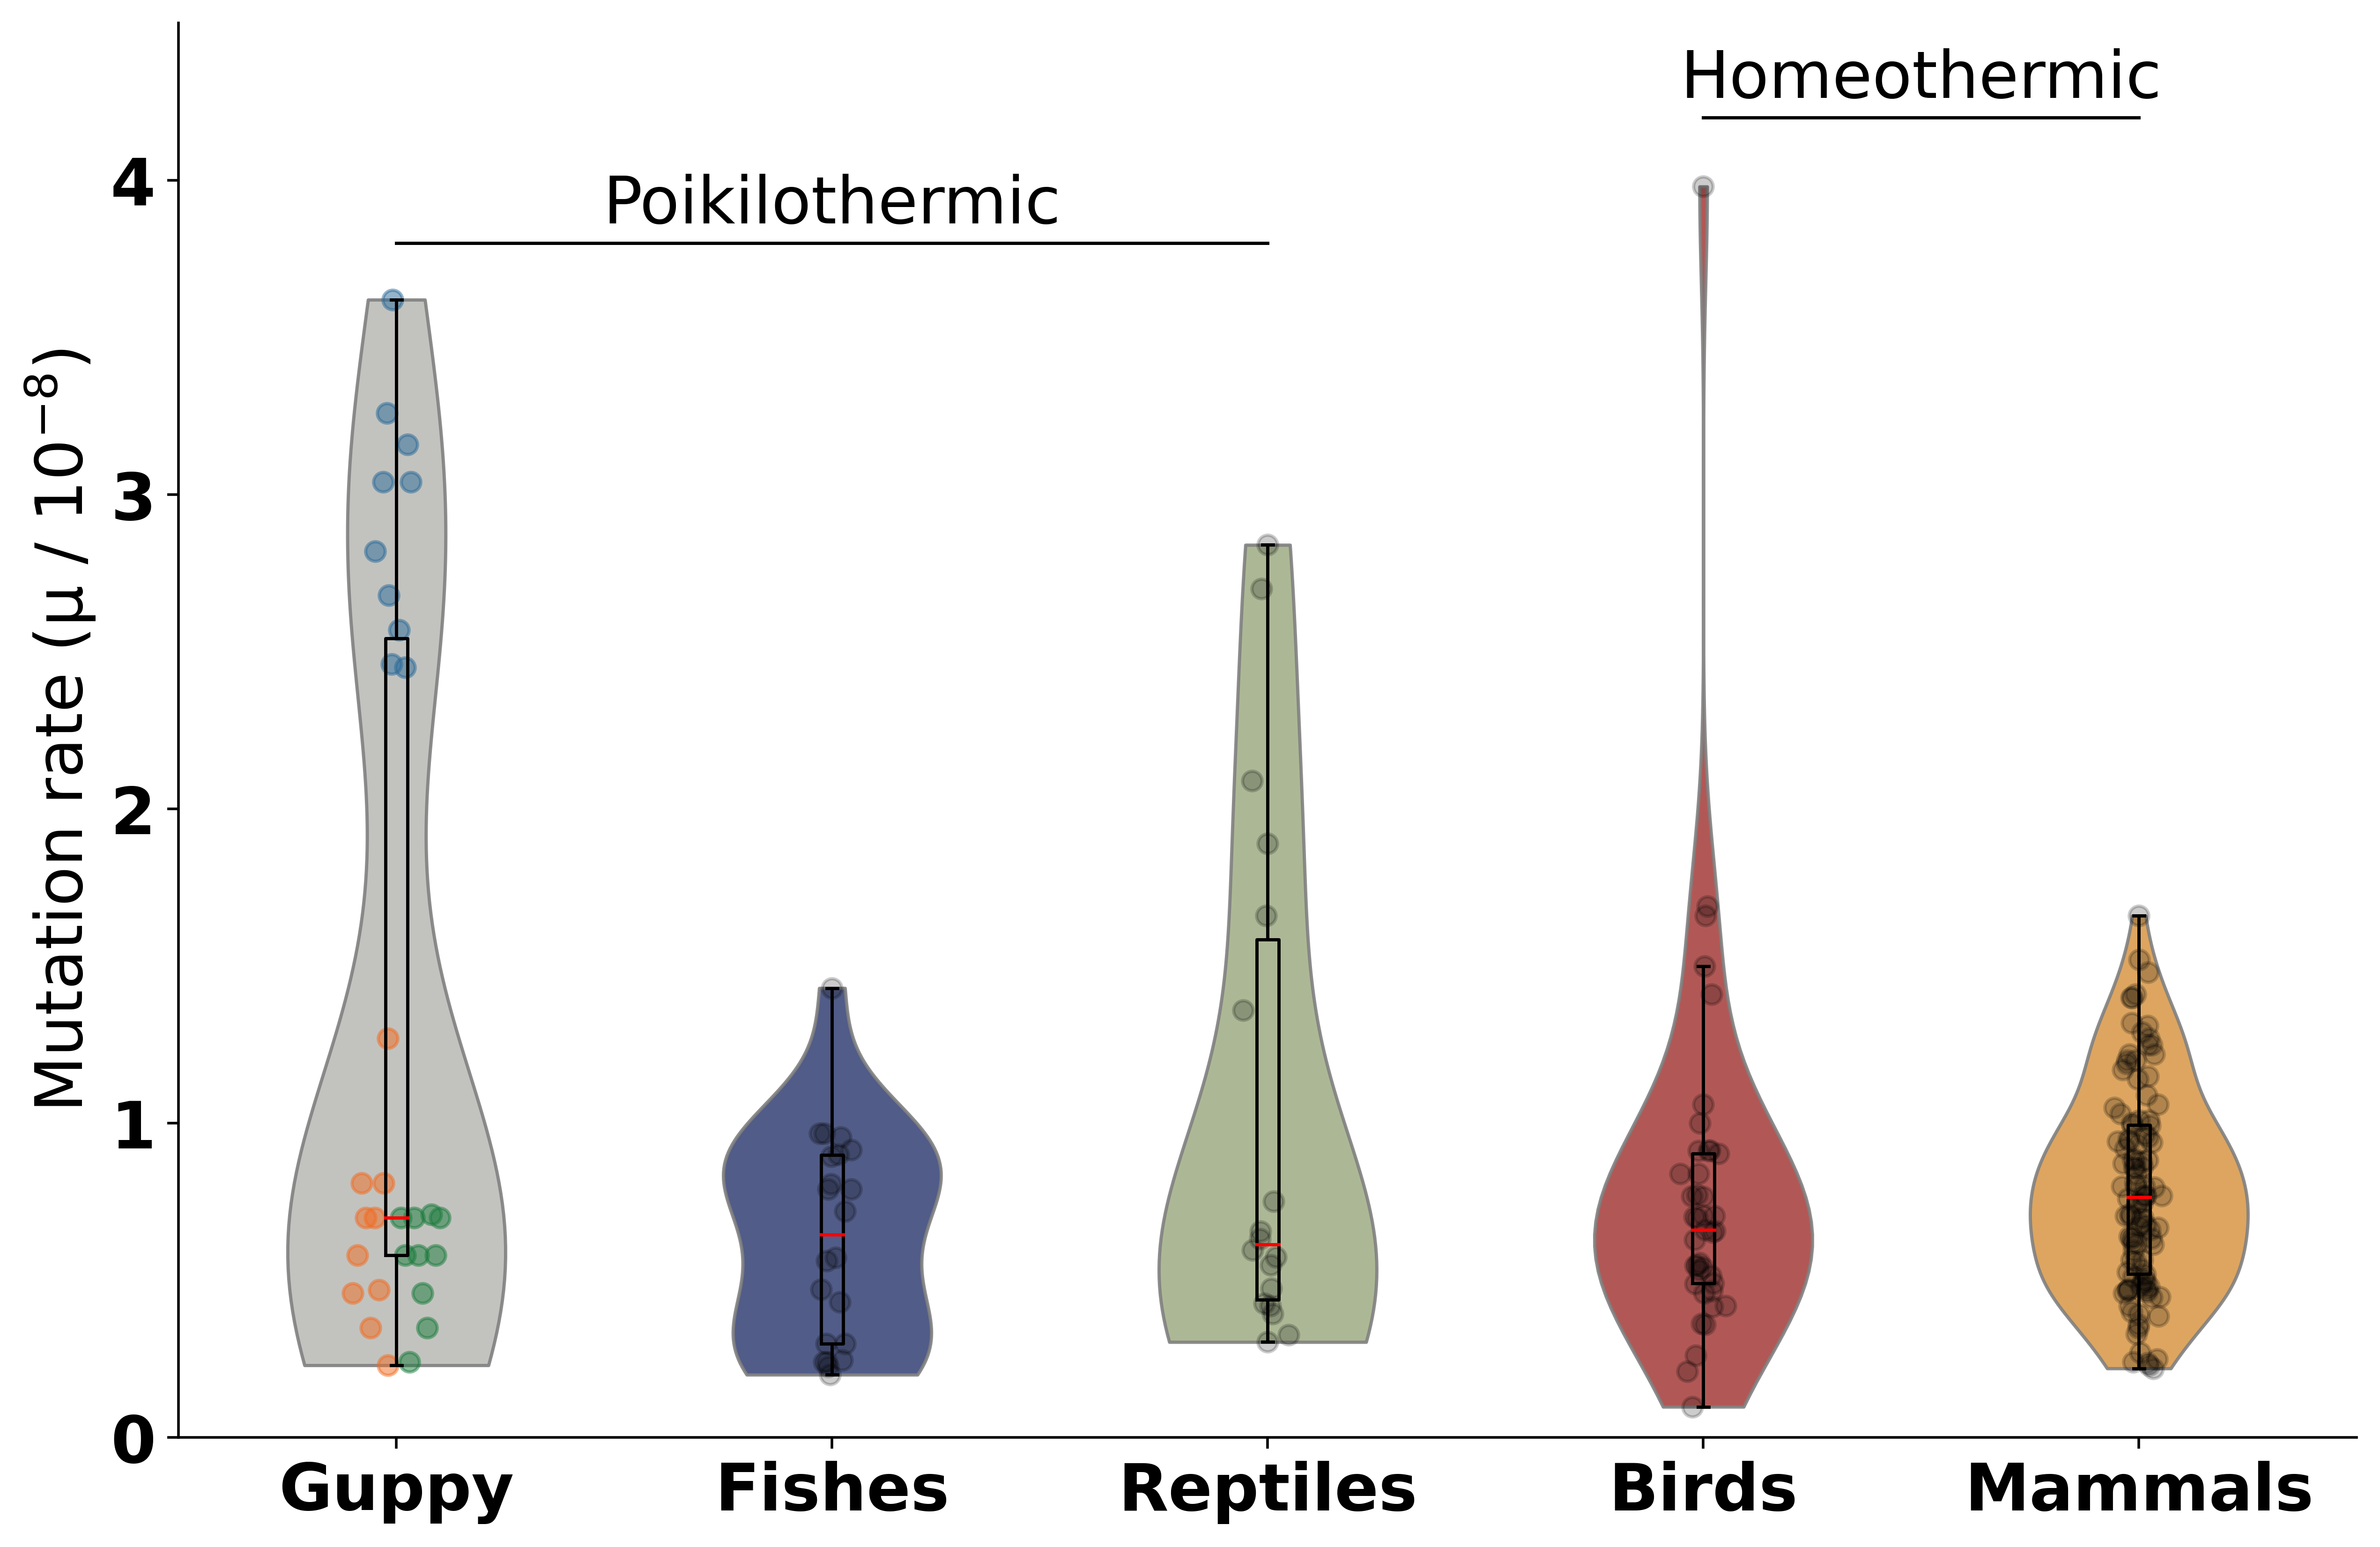

In [21]:
import matplotlib.pyplot as plt

data = {'Guppy':[0.23, 0.47, 0.7, 0.35, 0.81,0.58,0.7,0.46,1.27,0.81,3.26,2.45,2.57,3.04,2.46,3.04,2.82,3.62,3.16,2.68,
                 0.58,0.7,0.24,0.58,0.58,0.46,0.7,0.35,0.71,0.7],
        'Fish': [0.298, 0.894, 0.298, 0.562, 0.226, 0.791, 0.916, 0.79, 0.956, 0.573, 0.9, 0.72, 
                 0.241, 0.247, 1.43, 0.472, 0.24, 0.431, 0.967, 0.806, 0.967, 0.2],
        'Reptiles': [1.36, 2.09, 2.7, 2.84, 0.575, 1.66, 1.89, 0.751, 0.633, 0.42, 0.656, 0.596, 
                     0.426, 0.394, 0.549, 0.304, 0.327, 0.475],
        'Birds': [1.5, 0.261, 0.703, 0.467, 0.36, 0.657, 0.542, 0.914, 0.653, 0.707, 0.514, 0.363, 0.66, 1.06, 0.903,
                  0.773, 0.416, 0.533, 0.839, 1.41, 1.66, 1, 0.0979, 0.912, 0.21, 0.489, 0.557, 0.768, 0.419, 0.629, 
                  0.699, 0.767, 3.98, 0.706, 1.69, 0.547, 0.913, 0.547, 0.84, 0.491, 0.46],
        'Mammals': [0.944, 1.31, 0.769, 0.706, 0.859, 0.615, 0.942, 0.811, 0.993, 0.565, 0.512, 0.349, 1.25, 
                    0.595, 0.859, 0.886, 1.06, 0.668, 0.883, 0.747, 0.519, 0.446, 0.705, 1.01, 0.47, 0.637,
                    0.471, 1.19, 0.933, 1.4, 0.837, 1.05, 0.872, 0.884, 0.464, 0.617, 0.747, 0.964, 0.635, 
                    0.535, 1, 0.46, 1.41, 0.503, 0.489, 0.393, 0.448, 0.565, 0.238, 0.387, 0.467, 0.712, 
                    1.22, 1.4, 0.671, 0.956, 1.09, 0.796, 0.939, 1.15, 0.995, 0.675, 0.878, 0.526, 0.634, 
                    0.497, 1.01, 0.743, 0.471, 0.48, 0.699, 1.32, 1.27, 1.22, 1.03, 1.66, 1.48, 1.2, 1.14, 
                    0.4, 0.92, 0.66, 0.24, 0.22, 0.77, 0.33, 0.42, 0.62, 0.95, 0.25, 0.27, 0.23, 0.76, 0.68,
                    0.48, 0.8, 1.25, 0.64, 1.2, 1.29, 0.56, 0.8, 0.8, 0.77, 0.77, 0.36, 1.52, 0.7, 1.17, 0.86]}



fig,ax = plt.subplots(figsize =(12, 8), dpi=500)
violin_parts = ax.violinplot(data.values(), showmedians=False, showmeans=False, 
        showextrema=False)

#colors = ['#DA9B4F', '#3E4A7B', '#A3B18A', "#A94643", "#BCBDB8"]
colors = ["#BCBDB8",  '#3E4A7B', '#A3B18A', "#A94643",'#DA9B4F' ]
#colors = ["#ff9200","#0094ff","#008d00","#cfd99e","#e5086a"]
for pc,color in zip(violin_parts['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_edgecolor("grey")
    pc.set_alpha(0.9)

def double(list):
    empty = []
    for i in ["#BCBDB8",  '#3E4A7B', '#A3B18A', "#A94643",'#DA9B4F']:
        empty.append(i)
        empty.append(i)
    return empty

bplot = ax.boxplot(data.values(), widths=[0.05,0.05,0.05,0.05,0.05], 
                   vert=True, 
                   showfliers=False)
                  # patch_artist=True)

for patch, color in zip(bplot['boxes'], colors):
        patch.set_color("black")
        #patch.set_edgecolor("black")
        #patch.set_fill(True)
for patch, color in zip(bplot['medians'], colors):
        patch.set_color("red")
        
for patch, color in zip(bplot['whiskers'], color):
        patch.set_color("black")
        #patch.set_color(color)  
for patch, color in zip(bplot['means']):
        patch.set_color("black")  

mylist = list(np.arange(0.9,1.1,0.01))

random.seed(123)
np.random.seed(123)
first = data["Guppy"][:10]
third = data["Guppy"][20:]

random.shuffle(first)
ax.scatter(0.98, max(first),  marker="o", color='#f16c23', alpha=0.5)
first.remove(max(first))
ax.scatter(mylist[:9], first,  marker="o", color='#f16c23', alpha=0.5)
ax.scatter(np.random.normal(1, 0.02, size=10), data["Guppy"][10:20], marker="o", color='#2b6a99', alpha=0.5)
random.seed(123)
third = [0.7,0.58,0.24,0.7,0.58,0.46,0.35,0.71,0.58,0.7]
ax.scatter(mylist[11:], third, marker="o", color='#1b7c3d', alpha=0.5)
ax.scatter(2, max(data["Fish"]),color="black", alpha=0.2)
data["Fish"].remove(max(data["Fish"]))
ax.scatter(np.random.normal(2, 0.02, size=len(data["Fish"])), data["Fish"], color="black", alpha=0.2)

ax.scatter(3, max(data["Reptiles"]), c="black", alpha=0.2)
data["Reptiles"].remove(max(data["Reptiles"]))
ax.scatter(np.random.normal(3, 0.02, size=len(data["Reptiles"])), data["Reptiles"], c="black", alpha=0.2)

np.random.seed(78901)
data["Birds"].remove(3.98)
ax.scatter(np.random.normal(4, 0.02, size=len(data["Birds"])), data["Birds"], c="black", alpha=0.2)
ax.scatter(4, 3.98, c="black", alpha=0.2)

np.random.seed(123)
ax.scatter(5, max(data["Mammals"]), c="black", alpha=0.2)
data["Mammals"].remove(max(data["Mammals"]))
ax.scatter(np.random.normal(5, 0.02, size=len(data["Mammals"])), data["Mammals"], c="black", alpha=0.2)
# ax.boxplot(data.values(),
#                      boxprops=boxprops,
#                      vert=True,  # vertical box alignment
#                      patch_artist=True, widths=[0.05,0.5,0.5,0.5,0.5])
ax.set_xticklabels(labels = ["Guppy", "Fishes", 'Reptiles','Birds','Mammals'], fontsize=20)
#ax.set_yticklabels(,fontweight='bold')
#ax.set_ylabel(r'Mutation rate (μ / $10^{-8}$)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(0,4.5)
plt.yticks(np.arange(0, 5, step=1), fontweight ='bold', fontsize = 20)
plt.ylabel('Mutation rate (μ / $10^{-8}$)', fontsize = 20)
plt.xticks(fontweight ='bold', fontsize =20)
plt.plot(
        [1, 1, 3, 3],
        [3.8, 3.8, 3.8, 3.8], lw=1, c='k'
    )
plt.plot(
        [4, 4, 5, 5],
        [4.2, 4.2, 4.2, 4.2], lw=1, c='k'
    )
plt.text((1 + 3) * 0.5, 3.82, "Poikilothermic", ha='center', va='bottom', c='k', fontsize=20)
plt.text((4 + 5) * 0.5, 4.22, "Homeothermic", ha='center', va='bottom', c='k', fontsize=20)
#ax.set_title('Distribution of Values by Animal Type')

plt.savefig('Fig3_DNMsDist.jpg', format = 'jpeg', dpi=500, pad_inches=0)
plt.show()